In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df= pd.read_csv('./data/fraud data.csv')
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
df.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

There are 3 object that we want to remove, but before removing it, we have to check either the feature have impact to our model later on or not.

In [5]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


Let's see if the data have nulls/duplicates.

In [6]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [7]:
df.duplicated()

0          False
1          False
2          False
3          False
4          False
           ...  
6362615    False
6362616    False
6362617    False
6362618    False
6362619    False
Length: 6362620, dtype: bool

There are no duplicates and null, so we are good to go. I want to check the correlation of each feature using correlation matrix.

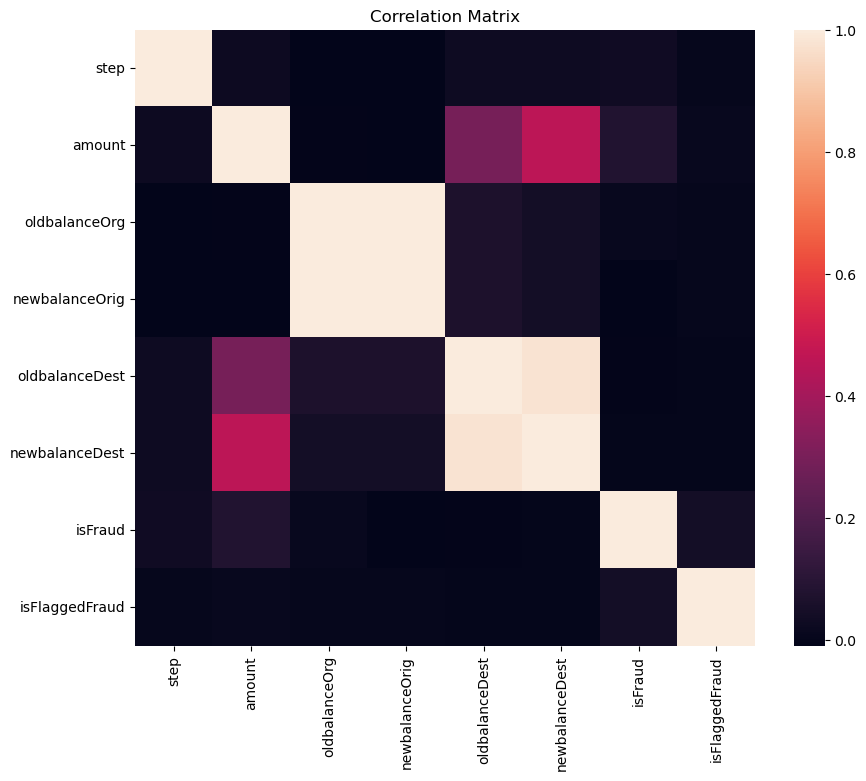

In [8]:
correlation_matrix=df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix)
plt.title('Correlation Matrix')
plt.show()

I see some pattern between NameOrig and NameDest, it started with either C or M. C means Customer and M means Merchants. Let's add some feature and see the pattern there.

In [9]:
df2= df.copy()
df2['type2']=np.nan
df2.loc[df['nameOrig'].str.contains('C') & df['nameDest'].str.contains('C'), 'type2'] = 'CC'
df2.loc[df['nameOrig'].str.contains('C') & df['nameDest'].str.contains('M'), 'type2'] = 'CM'
df2.loc[df['nameOrig'].str.contains('M') & df['nameDest'].str.contains('C'), 'type2'] = 'MC'
df2.loc[df['nameOrig'].str.contains('M') & df['nameDest'].str.contains('C'), 'type2'] = 'MM'

In [10]:
df2.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type2
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,CM
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,CM
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,CC
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,CC
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,CM


After make a new feature, i'm going to drop columns 'nameOrig' and 'nameDest' since they have no use anymore.

In [11]:
df2.drop(columns=['nameOrig','nameDest'],inplace=True)

I want to check the correlation between type2 columns and fraud columns.

In [12]:
fraud = df2[df2['isFraud'] == 1].type2.value_counts()
valid = df2[df2['isFraud'] == 0].type2.value_counts()

print(fraud)
print(valid)

CC    8213
Name: type2, dtype: int64
CC    4202912
CM    2151495
Name: type2, dtype: int64


The number of Fraud Transactions is 8213 and made by customer to customer. The number of Valid Transactions at 635k with most of them coming from customer to customer. Now, we're going to plot and visualize the data.

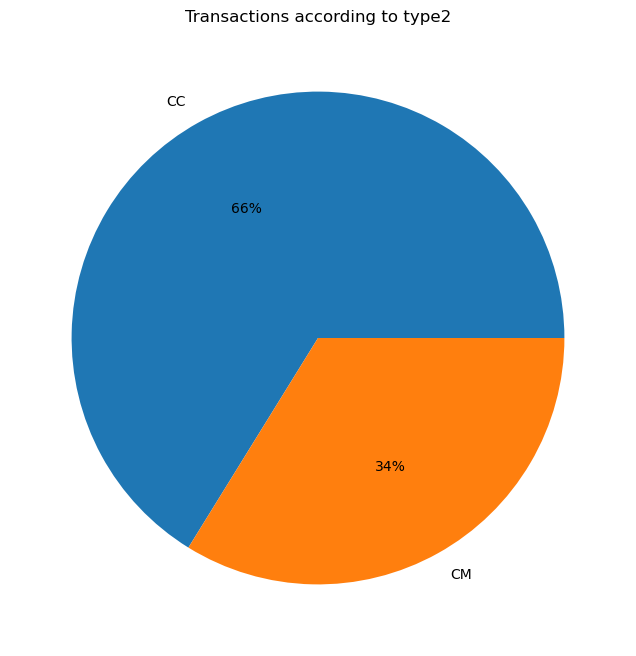

In [13]:
plt.figure(figsize=(15,8))
plt.pie(df2.type2.value_counts().values,labels=df2.type2.value_counts().index,autopct='%.0f%%')
plt.title("Transactions according to type2")
plt.show()

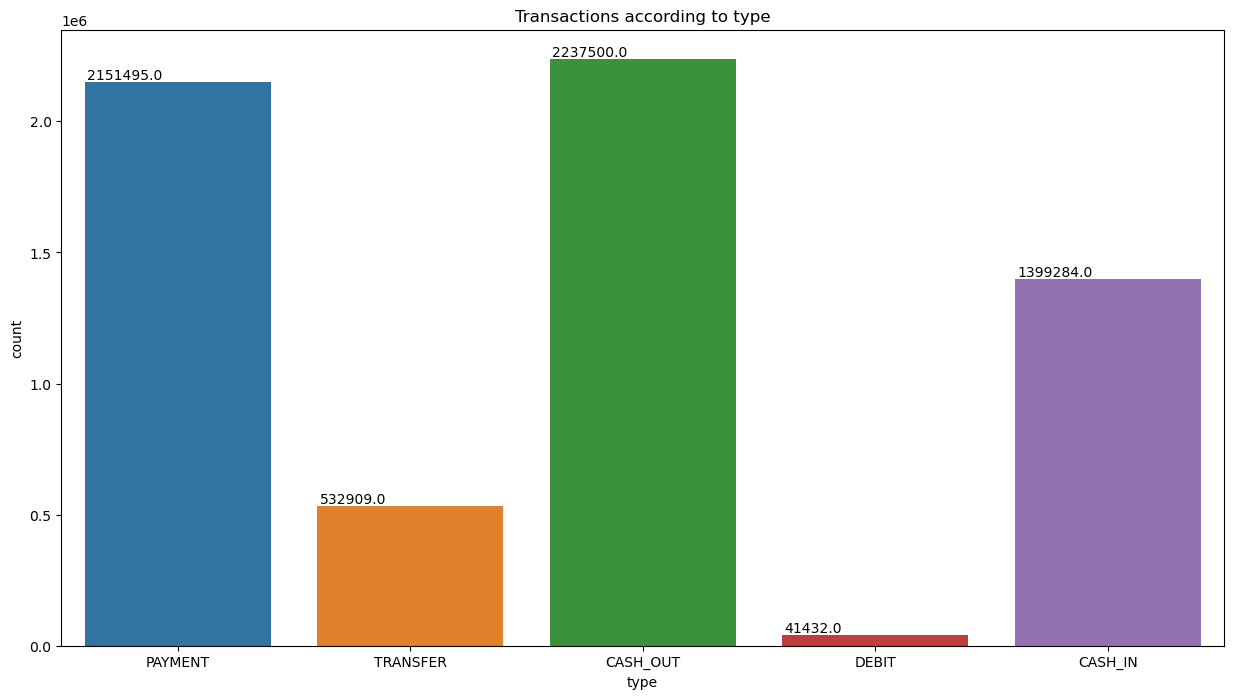

In [14]:
plt.figure(figsize = (15, 8))
ax=sns.countplot(data = df2, x = "type")
plt.title('Transactions according to type')
for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.01, p.get_height()+10000))

After visualizing the data, seems like the data is very large and the difference between fraud and valid transactions is too far. We couldn't see clearly the difference between fraud transactions and valid transactions. Let's change the 'object' columns using 'get_dummies' and jump straight to data preprocessing and model.

In [15]:
df3=pd.get_dummies(df2,prefix = ['type', 'type2'])
df3.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,type2_CC,type2_CM
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0,0,0,0,1,0,0,1
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0,0,0,0,1,0,0,1
2,1,181.00,181.0,0.00,0.0,0.0,1,0,0,0,0,0,1,1,0
3,1,181.00,181.0,0.00,21182.0,0.0,1,0,0,1,0,0,0,1,0
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,0,0,0,0,1,0,0,1


In [16]:
corr_matrix_new=df3.corr()['isFraud'].sort_values(ascending=False)
print(corr_matrix_new)

isFraud           1.000000
amount            0.076688
type_TRANSFER     0.053869
isFlaggedFraud    0.044109
step              0.031578
type2_CC          0.025697
type_CASH_OUT     0.011256
oldbalanceOrg     0.010154
newbalanceDest    0.000535
type_DEBIT       -0.002911
oldbalanceDest   -0.005885
newbalanceOrig   -0.008148
type_CASH_IN     -0.019089
type_PAYMENT     -0.025697
type2_CM         -0.025697
Name: isFraud, dtype: float64


In [17]:
df3.dtypes

step                int64
amount            float64
oldbalanceOrg     float64
newbalanceOrig    float64
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
type_CASH_IN        uint8
type_CASH_OUT       uint8
type_DEBIT          uint8
type_PAYMENT        uint8
type_TRANSFER       uint8
type2_CC            uint8
type2_CM            uint8
dtype: object

There is no string/object remaining, we're good to go!

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X=df3.drop('isFraud',axis=1)
Y=df3['isFraud']

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3,random_state=101)
scaler=StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

I'm using K-Neighbors Classifier. 

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report
model=KNeighborsClassifier(n_neighbors=5)
model.fit(X_train,Y_train)
Y_pred= model.predict(X_test)
accuracy=accuracy_score(Y_test,Y_pred)
report=classification_report(Y_test,Y_pred)

print(f"Accuracy is {accuracy}")
print(f"Classification report is {report} ")


Accuracy is 0.9995153987927405
Classification report is               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906369
           1       0.96      0.65      0.77      2417

    accuracy                           1.00   1908786
   macro avg       0.98      0.82      0.89   1908786
weighted avg       1.00      1.00      1.00   1908786
 
